## Observations and Insights 

In [3]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
merged_df = pd.merge(study_results,mouse_metadata,on="Mouse ID",how="left")

# Display the data table for preview
merged_df.head()

,Mouse ID,Timepoint,Tumour Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [4]:
# Checking the number of mice.
mousecount = merged_df["Mouse ID"].nunique()
mousecount

249

In [5]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

duplicates = merged_df.loc[:,("Mouse ID","Timepoint","Weight (g)")]
dup_series = duplicates.groupby('Mouse ID').count()
dup_series.sort_values(by="Timepoint",ascending=False, inplace=True)
duplicate_mouse = dup_series.index[0]
duplicate_mouse.replace("'","")
duplicate_mouse

'g989'

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 



In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
indexed_preclean = merged_df.set_index('Mouse ID')
index_cleaned_df = indexed_preclean.drop(duplicate_mouse)
cleaned_df = index_cleaned_df.reset_index()
cleaned_df

,Mouse ID,Timepoint,Tumour Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1875,r944,45,41.581521,2,Capomulin,Male,12,25
1876,u364,45,31.023923,3,Capomulin,Male,18,17
1877,p438,45,61.433892,1,Ceftamin,Female,11,26
1878,x773,45,58.634971,4,Placebo,Female,21,30


In [7]:
# Checking the number of mice in the clean DataFrame.
clean_mousecount = cleaned_df["Mouse ID"].nunique()
clean_mousecount

248

## Summary Statistics

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumour volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean
mean_series = cleaned_df.groupby('Drug Regimen')['Tumour Volume (mm3)'].mean()
mean = mean_series.rename("Mean")
# median, 
median_series = cleaned_df.groupby('Drug Regimen')['Tumour Volume (mm3)'].median()
median = median_series.rename("Median")
# variance
variance_series = cleaned_df.groupby('Drug Regimen')['Tumour Volume (mm3)'].var()
variance = variance_series.rename("Variance")
# standard deviation
sd_series = cleaned_df.groupby('Drug Regimen')['Tumour Volume (mm3)'].std()
sd = sd_series.rename("Standard Deviation")
# and SEM 
sem_series = cleaned_df.groupby('Drug Regimen')['Tumour Volume (mm3)'].sem()
sem = sem_series.rename("SEM")

# Assemble the resulting series into a single summary dataframe.

merge1 = pd.merge(mean,median,on="Drug Regimen",how="outer")
merge2 = pd.merge(merge1,variance,on="Drug Regimen",how="outer")
merge3 = pd.merge(merge2,sd,on="Drug Regimen",how="outer")
final_summary = pd.merge(merge3,sem,on="Drug Regimen",how="outer")
final_summary

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumour volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
agg_summary = cleaned_df.groupby('Drug Regimen')['Tumour Volume (mm3)'].agg(['mean','median','var','std','sem'])
agg_summary

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

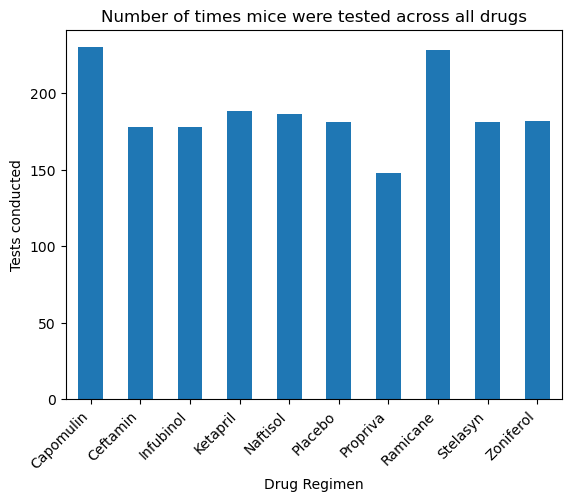

In [10]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
time_by_drug = cleaned_df.loc[:,("Drug Regimen","Timepoint")]
counted_df = time_by_drug.groupby('Drug Regimen')["Timepoint"].count()
ax = counted_df.plot.bar(rot=0)
ax = plt.xticks(rotation=45, ha="right")
ax = plt.ylabel("Tests conducted")
ax = plt.title("Number of times mice were tested across all drugs")

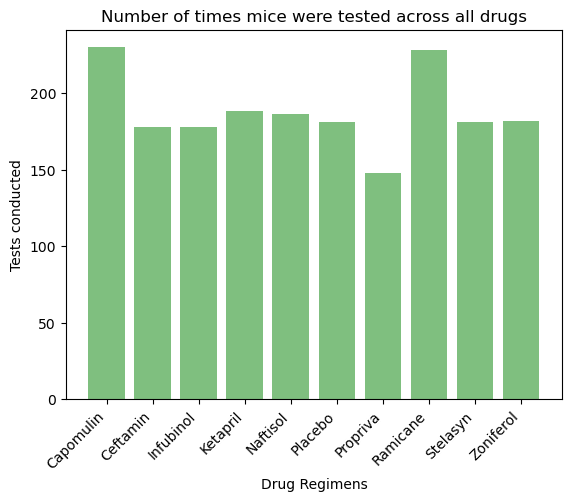

In [11]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.

time_pts = cleaned_df.groupby('Drug Regimen')['Timepoint'].count().to_list()
array_drug_r = cleaned_df["Drug Regimen"].unique()
ordered_d_r = array_drug_r.sort()
list_d_r = array_drug_r.tolist()

plt.bar(list_d_r, time_pts, color='g', alpha=0.5, align="center")
plt.title("Number of times mice were tested across all drugs")
plt.xlabel("Drug Regimens")
plt.ylabel("Tests conducted")
plt.xticks(rotation=45, ha="right")
plt.show()

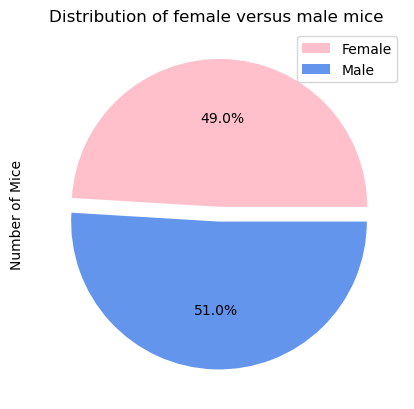

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
maleVSfemale = cleaned_df.loc[:,("Mouse ID","Sex")]
sex_counted = maleVSfemale.groupby("Sex")["Mouse ID"].count().rename("Number of Mice")
ax = sex_counted.plot(kind="pie", autopct='%1.1f%%', explode=[0.05, 0.05], colors=['pink','cornflowerblue'], legend=True, title='Distribution of female versus male mice ', labeldistance=None)


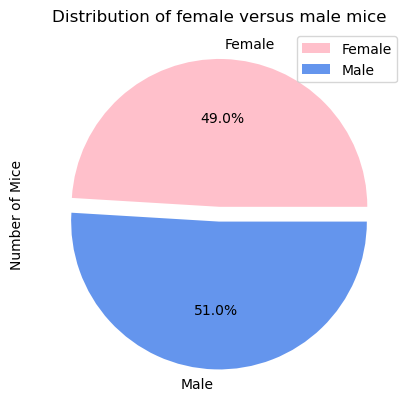

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
sex_count_list = cleaned_df.groupby('Sex')['Mouse ID'].count().to_list()
sex_name_list = cleaned_df["Sex"].unique().tolist() 

plt.pie(sex_count_list, labels=sex_name_list, colors=['pink','cornflowerblue'], autopct='%1.1f%%', explode=[0.05, 0.05])
plt.title('Distribution of female versus male mice')
plt.ylabel("Number of Mice")
plt.legend(sex_name_list,loc="best")
plt.show()

## Quartiles, Outliers and Boxplots

In [14]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
four_drug_df = cleaned_df.loc[((cleaned_df["Drug Regimen"] == "Capomulin") | (cleaned_df["Drug Regimen"] =="Ramicane") | (cleaned_df["Drug Regimen"] == "Infubinol") | (cleaned_df["Drug Regimen"] == "Ceftamin")),:]

greatest_series = four_drug_df.groupby("Mouse ID")["Timepoint"].max()
greatest_df = pd.DataFrame(greatest_series)

# Merge this group df with the original dataframe to get the tumour volume at the last timepoint
merged_df2 = greatest_df.merge(cleaned_df, how="inner", on = ["Mouse ID", "Timepoint"])
merged_df2

,Mouse ID,Timepoint,Tumour Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a275,45,62.999356,3,Ceftamin,Female,20,28
3,a411,45,38.407618,1,Ramicane,Male,3,22
4,a444,45,43.047543,0,Ramicane,Female,10,25
...,...,...,...,...,...,...,...,...
95,y769,45,68.594745,4,Ceftamin,Female,6,27
96,y793,45,31.896238,2,Capomulin,Male,17,17
97,y865,45,64.729837,3,Ceftamin,Male,23,26
98,z578,45,30.638696,0,Ramicane,Male,11,16


In [30]:
# Put treatments into a list for for loop (and later for plot labels)
treatments_list = merged_df2["Drug Regimen"].unique().tolist()
treatments_list.sort()

# Create empty list to fill with tumour vol data (for plotting)
t_volume = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 

tumor_df = pd.DataFrame()

for drug in treatments_list:
    
    # Locate the rows which contain mice on each drug and get the tumour volumes
    currentDrug = merged_df2.loc[merged_df2["Drug Regimen"] == drug,:]
    
    # add subset 
    t_volume = currentDrug["Tumour Volume (mm3)"]
    
    # Determine outliers using upper and lower bounds
    quartiles = t_volume.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq

    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    print(f"{drug} tumor size stats:")
    print(f"Lower quartile: {lowerq}")
    print(f"Upper quartile: {upperq}")
    print(f"IQR: {iqr}")
    print(f"Values below {lower_bound} could be outliers.")
    print(f"Values above {upper_bound} could be outliers.")
    
    outliers = []
    for x in t_volume:
        if x > upper_bound:
            outliers.append(x)
        elif x < lower_bound:
            outliers.append(x)

    if len(outliers) >= 1:
        print(f"The tumour size/s {outliers} have been identified as outliers for {drug}.\n")
    else:
        print(f"No outliers were identified.\n")
    tumor_df[drug] = t_volume.values
    

Capomulin tumor size stats:
Lower quartile: 32.37735684
Upper quartile: 40.1592203
IQR: 7.781863460000004
Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.
No outliers were identified.

Ceftamin tumor size stats:
Lower quartile: 48.72207785
Upper quartile: 64.29983003
IQR: 15.577752179999997
Values below 25.355449580000002 could be outliers.
Values above 87.66645829999999 could be outliers.
No outliers were identified.

Infubinol tumor size stats:
Lower quartile: 54.04860769
Upper quartile: 65.52574285
IQR: 11.477135160000003
Values below 36.83290494999999 could be outliers.
Values above 82.74144559000001 could be outliers.
The tumour size/s [36.3213458] have been identified as outliers for Infubinol.

Ramicane tumor size stats:
Lower quartile: 31.56046955
Upper quartile: 40.65900627
IQR: 9.098536719999998
Values below 17.912664470000003 could be outliers.
Values above 54.30681135 could be outliers.
No outliers were identified.



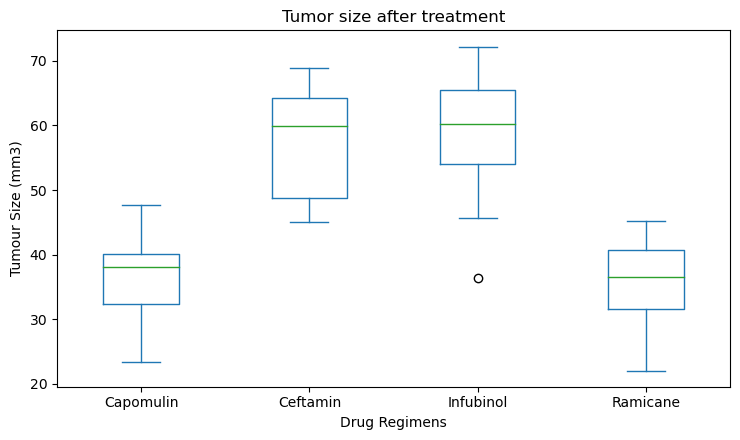

In [36]:
# Generate a box plot of the final tumour volume of each mouse across four regimens of interest
plt.rcParams["figure.figsize"] = [7.50, 4.50]
plt.rcParams["figure.autolayout"] = True


ax = tumor_df[treatments_list].plot(kind='box', title='boxplot')
ax = plt.xlabel("Drug Regimens")
ax = plt.ylabel("Tumour Size (mm3)")
ax = plt.title("Tumor size after treatment")


## Line and Scatter Plots

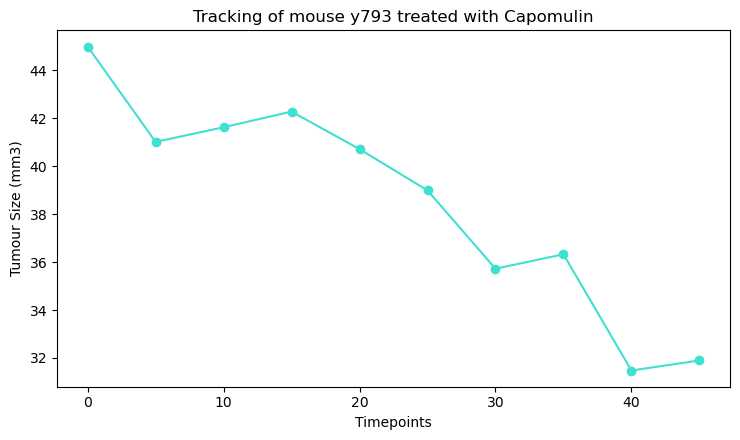

In [47]:
# Generate a line plot of tumour volume vs. time point for a mouse treated with Capomulin
mouse1 = "y793"
capomulin1_df = cleaned_df.loc[(cleaned_df["Mouse ID"] == mouse1),("Timepoint","Tumour Volume (mm3)")]
capomulin1_df.reset_index(drop=True)
plt.plot(capomulin1_df["Timepoint"],capomulin1_df["Tumour Volume (mm3)"],marker='o',color='turquoise', label="Tumour Size")
plt.xlabel('Timepoints')
plt.ylabel('Tumour Size (mm3)')
plt.title(f"Tracking of mouse {mouse1} treated with Capomulin")
plt.show()

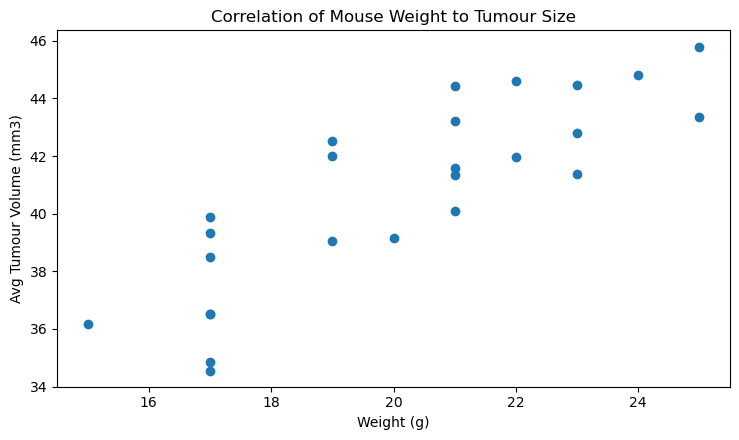

In [59]:
# Generate a scatter plot of average tumour volume vs. mouse weight for the Capomulin regimen
avg_columns = ["Tumour Volume (mm3)","Weight (g)"]
average_df = cleaned_df.loc[(cleaned_df["Drug Regimen"] == "Capomulin"),:].groupby("Mouse ID")[avg_columns].mean()

plt.scatter(average_df["Weight (g)"],average_df["Tumour Volume (mm3)"])
plt.xlabel('Weight (g)')
plt.ylabel('Avg Tumour Volume (mm3)')
plt.title('Correlation of Mouse Weight to Tumour Size')
plt.show()


## Correlation and Regression

The equation for the lineary regression is: y = 0.95x + 21.55


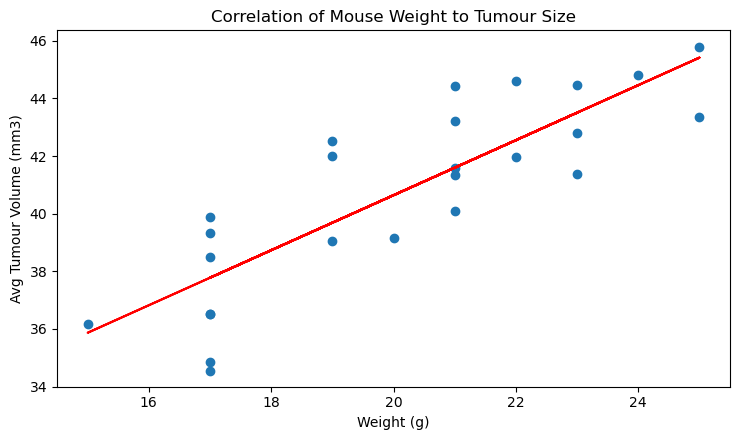

In [69]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumour volume for the Capomulin regimen
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(average_df["Weight (g)"],average_df["Tumour Volume (mm3)"])
regress_values = average_df["Weight (g)"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"The equation for the lineary regression is: {line_eq}")

plt.scatter(average_df["Weight (g)"],average_df["Tumour Volume (mm3)"])
plt.plot(average_df["Weight (g)"],regress_values,"r-")
plt.annotate(line_eq,(2,2),fontsize=8,color="red",ha= 'center')
plt.xlabel('Weight (g)')
plt.ylabel('Avg Tumour Volume (mm3)')
plt.title('Correlation of Mouse Weight to Tumour Size')
plt.show()
